<a href="https://colab.research.google.com/github/Rushabh-Dharamshi/Rushabh_Dharamshi_Portfolio/blob/main/Tesla_Stock_Price_Prediction_using_Tensorflow_without_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

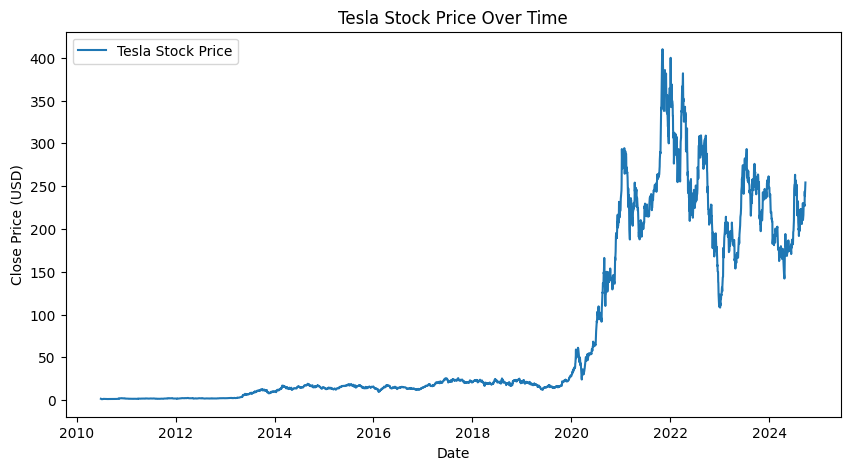

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Collecting the data
Tesla = yf.Ticker("TSLA")
Tesla_share_price_data = Tesla.history(period="max")
Tesla_share_price_data.reset_index(inplace=True)
Tesla_share_price_data.dropna(inplace=True)

# Visualizing the data
Tesla_Stock_Data = Tesla_share_price_data[['Date', 'Close']].copy()
Tesla_Stock_Data['Date'] = pd.to_datetime(Tesla_Stock_Data['Date'])

plt.figure(figsize=(10, 5))
plt.plot(Tesla_Stock_Data['Date'], Tesla_Stock_Data['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Data Preparation
train_data, test_data = train_test_split(Tesla_Stock_Data['Close'].values.reshape(-1, 1), test_size=0.2, shuffle=False)

scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

sequence_length = 30
x_train, y_train = create_sequences(train_data_scaled, sequence_length)
x_test, y_test = create_sequences(test_data_scaled, sequence_length)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [2]:
def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=False, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define model parameters
units = 100
dropout_rate = 0.2
batch_size = 32
epochs = 30

# Create and train the model
model = create_model(units=units, dropout_rate=dropout_rate)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

# Predict on the test set
predicted_stock_price = model.predict(x_test)

# Inverse transform to get actual prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 8.0536e-04 - val_loss: 0.0019
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.9548e-05 - val_loss: 0.0042
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.8878e-05 - val_loss: 0.0025
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.2140e-05 - val_loss: 0.0018
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.2446e-05 - val_loss: 0.0014
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.7024e-05 - val_loss: 0.0016
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.8885e-05 - val_loss: 0.0025
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.4687e-05 - val_loss: 0.0023
Epoch 9/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1573e-05 - val_loss: 0.0011
Epoch 10/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.8833e-05 - val_loss: 0.0010
Epoch 11/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4145e-05 - val_loss: 0.0037
Epoch 12/30
80/80 

Root Mean Squared Error (RMSE): 12.339096084928347


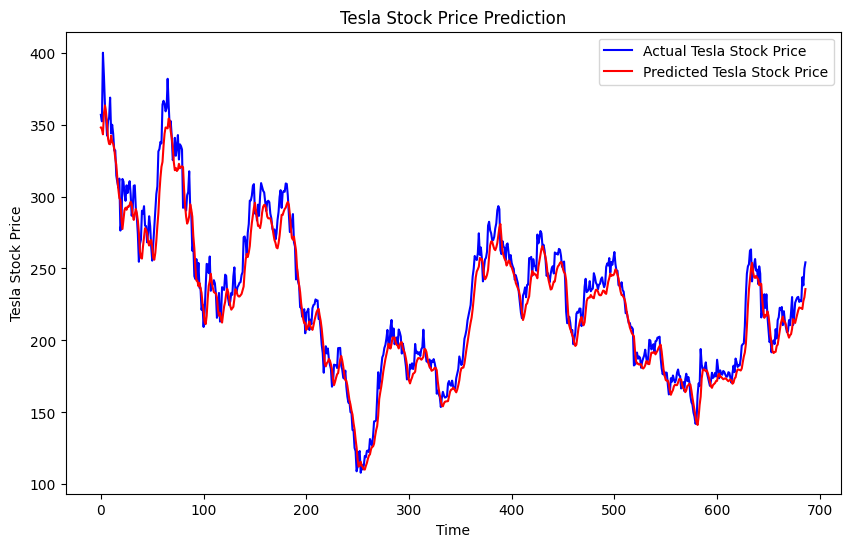

In [3]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price, color='blue', label='Actual Tesla Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()
